In [19]:
# enable autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from mephisto import Mephistogram

# 1D

## addition

(<Figure size 500x400 with 1 Axes>, <AxesSubplot:xlabel='the-axis'>)

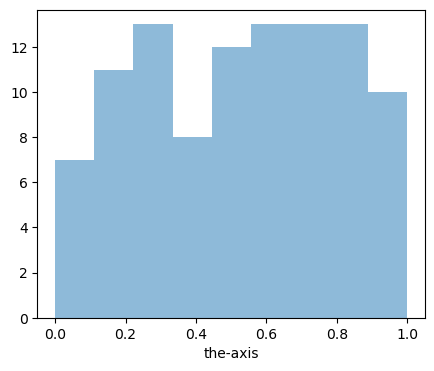

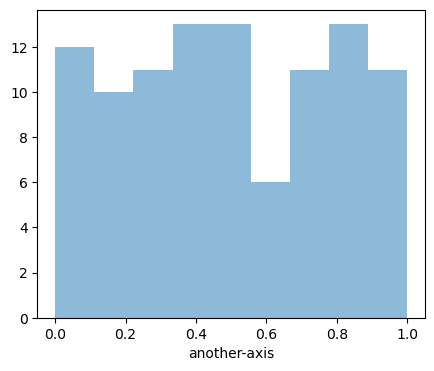

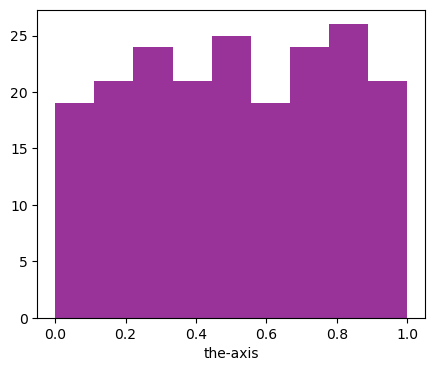

In [21]:
bins = np.linspace(0, 1, num=10)

nums = np.random.uniform(size=100)
h, xb = np.histogram(nums, bins=bins)
# give hist and bins directly to Mephistogram
m1 = Mephistogram(h, bins, axis_names="the-axis", make_hist=False)
m1.plot(alpha=0.5)

nums = np.random.uniform(size=100)
# use internal method to build the histogram
m2 = Mephistogram(nums, bins, axis_names="another-axis", make_hist=True)
m2.plot(alpha=0.5)

(m1+m2).plot(color="purple", alpha=0.8)

In [22]:
print(m1)

Mephistogram with 1 dimensions and shape (9,).
Axis names are the-axis.


# 2D

## addition


Mephistogram with 2 dimensions and shape (9, 6).
Axis names are ('x-axis', 'y-axis').


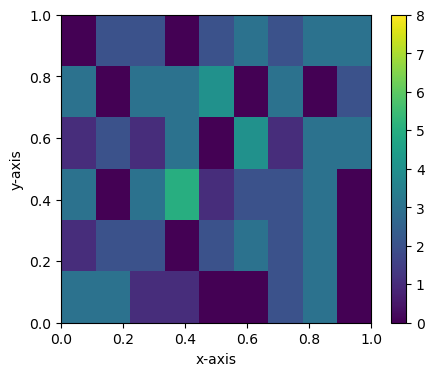

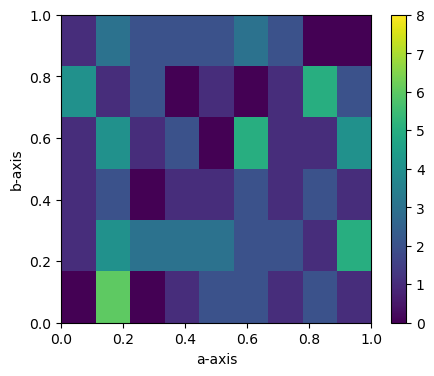

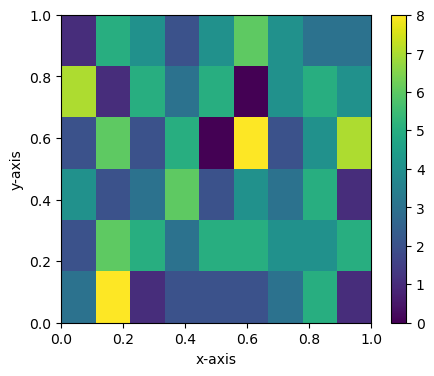

In [23]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))

nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

nums = np.random.uniform(size=(2, 100))
mh2 = Mephistogram(nums, bins, ("a-axis", "b-axis"), make_hist=True)
mh3 = mh1 + mh2

print(mh3)

mh1.plot(vmin=0, vmax=8)
plt.colorbar()
mh2.plot(vmin=0, vmax=8)
plt.colorbar()
mh3.plot(vmin=0, vmax=8)
plt.colorbar()

## matmul


Mephistogram with 2 dimensions and shape (9, 11).
Axis names are ('x-axis', 'b-axis').


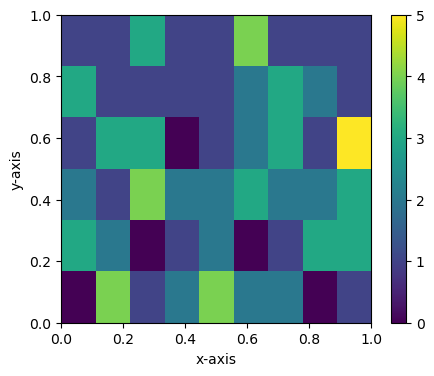

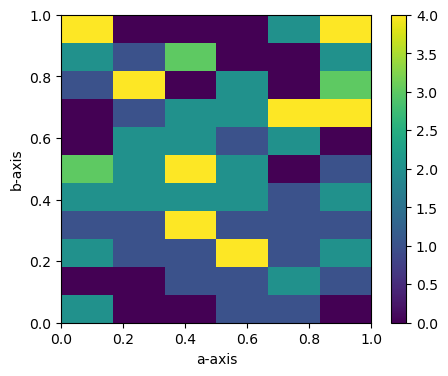

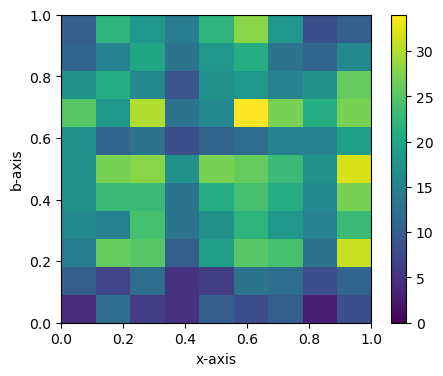

In [24]:
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))
nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

bins = (np.linspace(0, 1, num=7), np.linspace(0, 1, num=12))
nums = np.random.uniform(size=(2, 100))
h2, xb, yb = np.histogram2d(*nums, bins=bins)
mh2 = Mephistogram(h2, bins, ("a-axis", "b-axis"))
mh3 = mh1 @ mh2

print(mh3)

mh1.plot(vmin=0)
plt.colorbar()
mh2.plot(vmin=0)
plt.colorbar()
mh3.plot(vmin=0)
plt.colorbar()

## Transpose

Mephistogram with 2 dimensions and shape (9, 6).
Axis names are ('x-axis', 'y-axis'). Mephistogram with 2 dimensions and shape (6, 9).
Axis names are ('y-axis', 'x-axis').


(<Figure size 500x400 with 1 Axes>,
 <AxesSubplot:xlabel='y-axis', ylabel='x-axis'>)

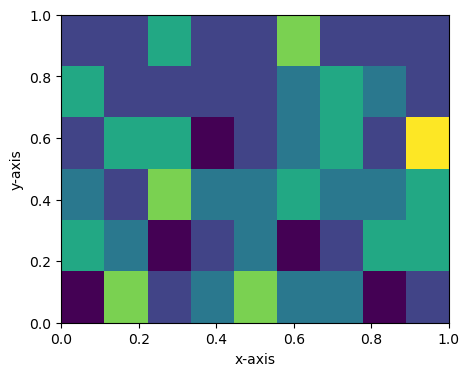

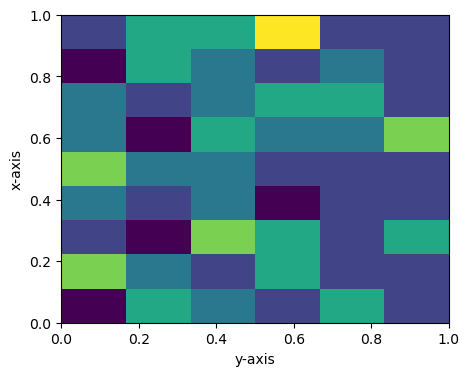

In [25]:
mhT = mh1.T()
print(mh1, mhT)

mh1.plot()
mhT.plot()

# other functionality

In [26]:
# dont raise error, just check
m1.match(mh2, verbose=False, raise_err=False)
# dont raise error, but print message
m1.match(mh2, verbose=True, raise_err=False)

Elementary arithmetic not possible. Shapes are (9,) and (6, 11);


False

In [27]:
# raise error
m1.match(mh2, raise_err=True)

ValueError: Elementary arithmetic not possible. Shapes are (9,) and (6, 11);

In [ ]:
# example math operations
mh = Mephistogram(
    np.random.uniform(size=100), bins=np.linspace(0, 1, num=11), make_hist=True
)

print(mh)
print(-mh)
print(mh - 2)
print(2 - mh)
print(mh / 2)
print(15 / mh)